***INDEX***
---
- [0. Data Load](#0data-load)
- [1. Merge Transaction & Articles](#1merge-transaction--articles)
- [2. Make Dummy Variable](#2make-dummy-variable)
- [3. Groupby DataFrame](#3groupby-dataframe)
    - [3.1. Reduce Memory Size(Convert dtypes)](#31reduce-memory-size-convert-dtypes)
    - [3.2. Make Gropuby DataFrame](#32make-gropuby-dataframe)
- [4. Statistic Check](#4statistic-check)
- [5. Clustering](#5clustering)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import warnings
from tqdm import tqdm

warnings.simplefilter(action="ignore")
data_path = "G:/내 드라이브/프로젝트/Kaggle_H&M/data/h-and-m-personalized-fashion-recommendations/"

# 0.Data Load
---

In [2]:
# df_customer = pd.read_csv(data_path+"customers.csv")
df_articles = pd.read_csv(data_path+"articles.csv")
df_transaction = pd.read_csv(data_path+"transactions_train.csv")

In [3]:
df_articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [4]:
df_transaction.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


# 1.Merge transaction & articles
---

In [5]:
merged_df = pd.merge(df_transaction, df_articles[["article_id","product_group_name"]], how="left", on="article_id")
merged_df.head()

,t_dat,customer_id,article_id,price,sales_channel_id,product_group_name
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,Underwear
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,Underwear
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,Garment Upper body
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,Garment Upper body
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,Garment Upper body


In [6]:
del (df_transaction, df_articles)

# 2.Make Dummy Variable
---

In [7]:
import warnings
from feature_engine.encoding import OneHotEncoder as OHE

warnings.simplefilter(action="ignore",category=Warning)

dummy_model = OHE(variables="product_group_name").fit(merged_df)
dummy_df = dummy_model.transform(merged_df)

In [8]:
del (merged_df, dummy_model)

In [9]:
dummy_df.drop(columns=["t_dat","sales_channel_id"], inplace=True)
dummy_df.head()

,customer_id,article_id,price,product_group_name_Underwear,product_group_name_Garment Upper body,product_group_name_Garment Lower body,product_group_name_Accessories,product_group_name_Socks & Tights,product_group_name_Shoes,product_group_name_Garment Full body,...,product_group_name_Underwear/nightwear,product_group_name_Cosmetic,product_group_name_Unknown,product_group_name_Items,product_group_name_Bags,product_group_name_Interior textile,product_group_name_Furniture,product_group_name_Garment and Shoe care,product_group_name_Stationery,product_group_name_Fun
0,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
dummy_df.info()     # 데이터 형변환 전

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31788324 entries, 0 to 31788323
Data columns (total 22 columns):
 #   Column                                    Dtype  
---  ------                                    -----  
 0   customer_id                               object 
 1   article_id                                int64  
 2   price                                     float64
 3   product_group_name_Underwear              int32  
 4   product_group_name_Garment Upper body     int32  
 5   product_group_name_Garment Lower body     int32  
 6   product_group_name_Accessories            int32  
 7   product_group_name_Socks & Tights         int32  
 8   product_group_name_Shoes                  int32  
 9   product_group_name_Garment Full body      int32  
 10  product_group_name_Nightwear              int32  
 11  product_group_name_Swimwear               int32  
 12  product_group_name_Underwear/nightwear    int32  
 13  product_group_name_Cosmetic               int32  
 14  

# 3.Groupby DataFrame
---

## 3.1.Reduce Memory Size (convert dtypes)
---

In [11]:
# 메모리 오버를 피하기 위해 삭제 추가 과정의 반복

for prod_col in tqdm(dummy_df.columns[3:]):
    temp = dummy_df[prod_col].astype("uint8").values
    dummy_df.drop(columns=[prod_col], inplace=True)
    dummy_df[prod_col.split("_")[-1]] = temp
dummy_df.info()     # 데이터 형변환 후

100%|██████████| 19/19 [00:18<00:00,  1.05it/s]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31788324 entries, 0 to 31788323
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   customer_id            object 
 1   article_id             int64  
 2   price                  float64
 3   Underwear              uint8  
 4   Garment Upper body     uint8  
 5   Garment Lower body     uint8  
 6   Accessories            uint8  
 7   Socks & Tights         uint8  
 8   Shoes                  uint8  
 9   Garment Full body      uint8  
 10  Nightwear              uint8  
 11  Swimwear               uint8  
 12  Underwear/nightwear    uint8  
 13  Cosmetic               uint8  
 14  Unknown                uint8  
 15  Items                  uint8  
 16  Bags                   uint8  
 17  Interior textile       uint8  
 18  Furniture              uint8  
 19  Garment and Shoe care  uint8  
 20  Stationery             uint8  
 21  Fun                    uint8  
dtypes: float64(1), i

## 3.2.Make Gropuby DataFrame
---

In [12]:
grouped_df = dummy_df.groupby(by=["customer_id"], as_index=False)[dummy_df.columns[2:]].sum()
grouped_df.head() 

,customer_id,price,Underwear,Garment Upper body,Garment Lower body,Accessories,Socks & Tights,Shoes,Garment Full body,Nightwear,...,Underwear/nightwear,Cosmetic,Unknown,Items,Bags,Interior textile,Furniture,Garment and Shoe care,Stationery,Fun
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.648983,0.0,16.0,2.0,1.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,2.601932,3.0,25.0,9.0,4.0,0.0,3.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.704780,3.0,9.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.060983,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0.469695,3.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
len(grouped_df["customer_id"])

1362281

In [16]:
grouped_df.head()

,customer_id,price,Underwear,Garment Upper body,Garment Lower body,Accessories,Socks & Tights,Shoes,Garment Full body,Nightwear,...,Underwear/nightwear,Cosmetic,Unknown,Items,Bags,Interior textile,Furniture,Garment and Shoe care,Stationery,Fun
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.648983,0.0,16.0,2.0,1.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,2.601932,3.0,25.0,9.0,4.0,0.0,3.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.704780,3.0,9.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.060983,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0.469695,3.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
for prod_col in tqdm(grouped_df.columns[2:]):
    grouped_df[prod_col] = grouped_df[prod_col].astype("uint8")
grouped_df.info()

100%|██████████| 19/19 [00:00<00:00, 36.89it/s]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1362281 entries, 0 to 1362280
Data columns (total 21 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   customer_id            1362281 non-null  object 
 1   price                  1362281 non-null  float64
 2   Underwear              1362281 non-null  uint8  
 3   Garment Upper body     1362281 non-null  uint8  
 4   Garment Lower body     1362281 non-null  uint8  
 5   Accessories            1362281 non-null  uint8  
 6   Socks & Tights         1362281 non-null  uint8  
 7   Shoes                  1362281 non-null  uint8  
 8   Garment Full body      1362281 non-null  uint8  
 9   Nightwear              1362281 non-null  uint8  
 10  Swimwear               1362281 non-null  uint8  
 11  Underwear/nightwear    1362281 non-null  uint8  
 12  Cosmetic               1362281 non-null  uint8  
 13  Unknown                1362281 non-null  uint8  
 14  Items             

# 4.Statistic Check
---

In [19]:
%matplotlib inline
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams["axes.unicode_minus"] = False
plt.style.use("ggplot")

## 4.1.Price Feature
---

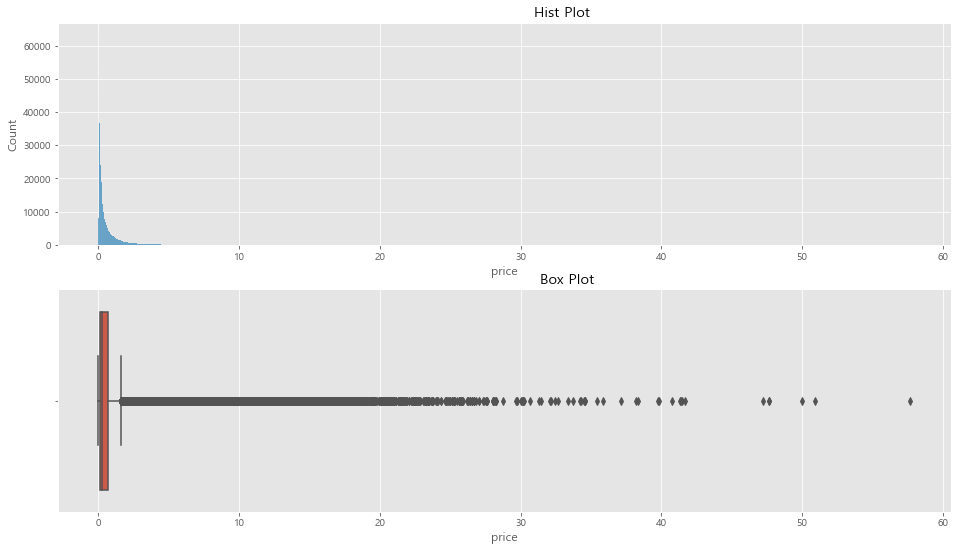

,Percent,Values,Count
0,0.0,0.000763,1
1,0.1,0.042339,138983
2,0.2,0.068593,133587
3,0.3,0.109068,136118
4,0.4,0.164305,136258
5,0.5,0.245593,136213
6,0.6,0.366492,136209
7,0.7,0.560542,136230
8,0.8,0.892695,136227
9,0.9,1.622898,136227


In [20]:
#-- quantile
idx, qnt, cnt = [], [0], []
for per in range(0,11):
    idx.append(per/10)
    qnt.append(grouped_df["price"].quantile(per/10))
    cnt.append(grouped_df["price"].loc[(grouped_df["price"]<=qnt[-1]) & 
                                       (grouped_df["price"]>qnt[-2])].count())
qnt.pop(0)

#-- visualization
fig, ax = plt.subplots(2,1, squeeze=True)

sns.histplot(ax=ax[0], data = grouped_df["price"])
ax[0].set_title("                       Hist Plot")
sns.boxplot(ax=ax[1], x=grouped_df["price"])
ax[1].set_title("                         Box Plot")
plt.show()

pd.DataFrame(data={"Percent" : idx,"Values" : qnt, "Count" : cnt})

In [21]:
# --counting per 1 unit

prices, cnt = [], []
for price in range(1, 60):
    start, end = price-1, price
    cnt.append(len(grouped_df["price"].loc[(grouped_df["price"]>start)&(grouped_df["price"]<=end)].values))
    prices.append(str(start)+"~"+str(end))

pd.set_option("display.max_rows", 10)
pd.DataFrame({"Range": prices, "Count": cnt})

,Range,Count
0,0~1,1119374
1,1~2,141714
2,2~3,48941
3,3~4,22215
4,4~5,11541
...,...,...
54,54~55,0
55,55~56,0
56,56~57,0
57,57~58,1


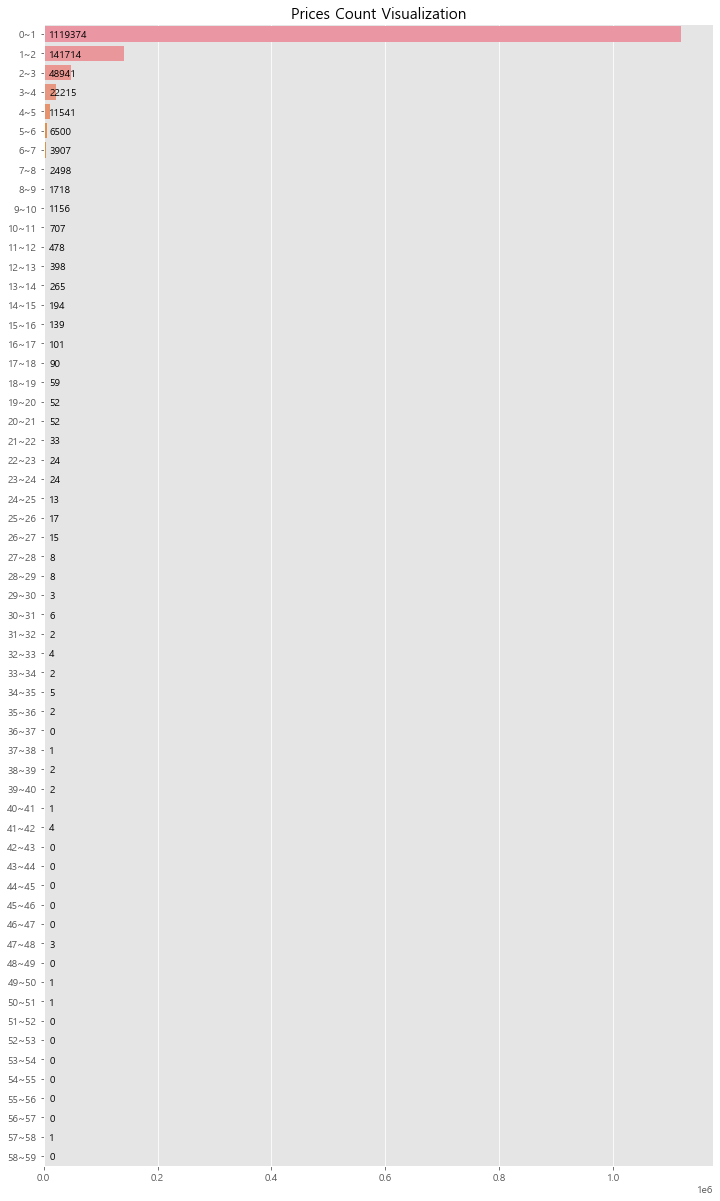

In [22]:
plt.figure(figsize=(12,21))
sns.barplot(x=cnt, y=prices)
mul = 0
for val in cnt:
    plt.text(x=10000, y=0.17+mul, s=str(val))
    mul+=1
plt.title("Prices Count Visualization", size=15)
plt.show()

## 4.2.Product Group Name Columns
---

100%|██████████| 19/19 [00:00<00:00, 1187.64it/s]


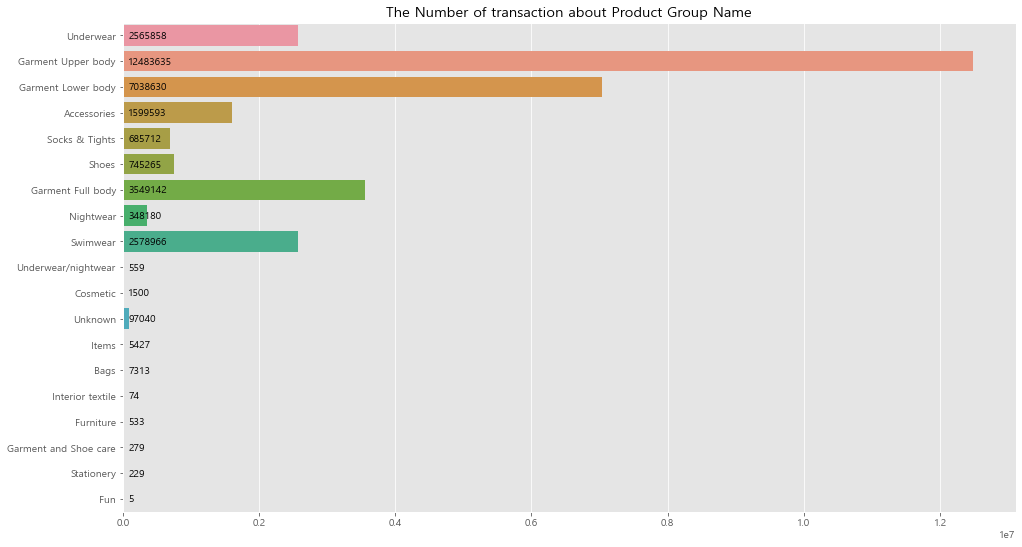

In [38]:
col_cnt = []
for col in tqdm(grouped_df.columns[2:]):
    col_cnt.append(grouped_df[col].sum())

# plt.rcParams["figure.figsize"] = (9,16)
sns.barplot(x=col_cnt, y=grouped_df.columns[2:])
plt.title("The Number of transaction about Product Group Name")

mul = 0
for val in col_cnt:
    plt.text(x=80000, y=0.11+mul, s=val)
    mul+=1

plt.show()

# 5.Clustering
---

In [ ]:
from sklearn.cluster import AgglomerativeClustering as AGC

ag_clusters = AGC(
    n_clusters=20,
    affinity='manhattan',
    linkage="average"
).fit(grouped_df.iloc[:,2:])

clusters = ag_clusters.labels_
df_cluster_pord_group = pd.DataFrame({"customer_id":grouped_df["customer_id"],
                                      "clusters":clusters})
df_cluster_pord_group.head()

"""

    Memorry Error !
    
"""

In [48]:
from sklearn.cluster import KMeans

km_cluster = KMeans(
    n_clusters=20,
).fit(grouped_df.iloc[:,1:])

grouped_df["cluster"] = km_cluster.labels_